<a href="https://colab.research.google.com/github/rayhanputtra/DataScience/blob/main/TugasChallange2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rayhan Putra Pratama**

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
!pip install category_encoders

In [ ]:
from google.colab import files
uploads = files.upload()

Saving Data Test.csv to Data Test.csv


In [ ]:
df_train = pd.read_csv('Data Train.csv')
df_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## **EDA**

Data Insights

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f


*   Terdapat 20 kolom dan 4250 index
*   Tidak ada data null
*   Data terdiri dari tipe object, int, dan float

In [ ]:
df_train.duplicated().sum()

0

Tidak ada data duplikat

In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



*   Mayoritas feature memiliki mean dan median (50%) yang tidak berbeda jauh -> kebanyakan feature mungkin berdistribusi normal
*   Terdapat banyak feature yang memiliki selisih yg besar antara nilai min dengan Q1 maupun max dengan Q3 -> kemungkinan ada outlier

In [ ]:
nums = ['total_day_calls', 'total_day_minutes', 'total_day_charge',
        'total_eve_calls', 'total_eve_minutes', 'total_eve_charge',
        'total_night_calls', 'total_night_minutes', 'total_night_charge',
       'total_intl_calls', 'total_intl_minutes', 'total_intl_charge',
       'account_length', 'number_customer_service_calls', 'number_vmail_messages']

**Memastikan distribusi dan outlier**


 Histplot

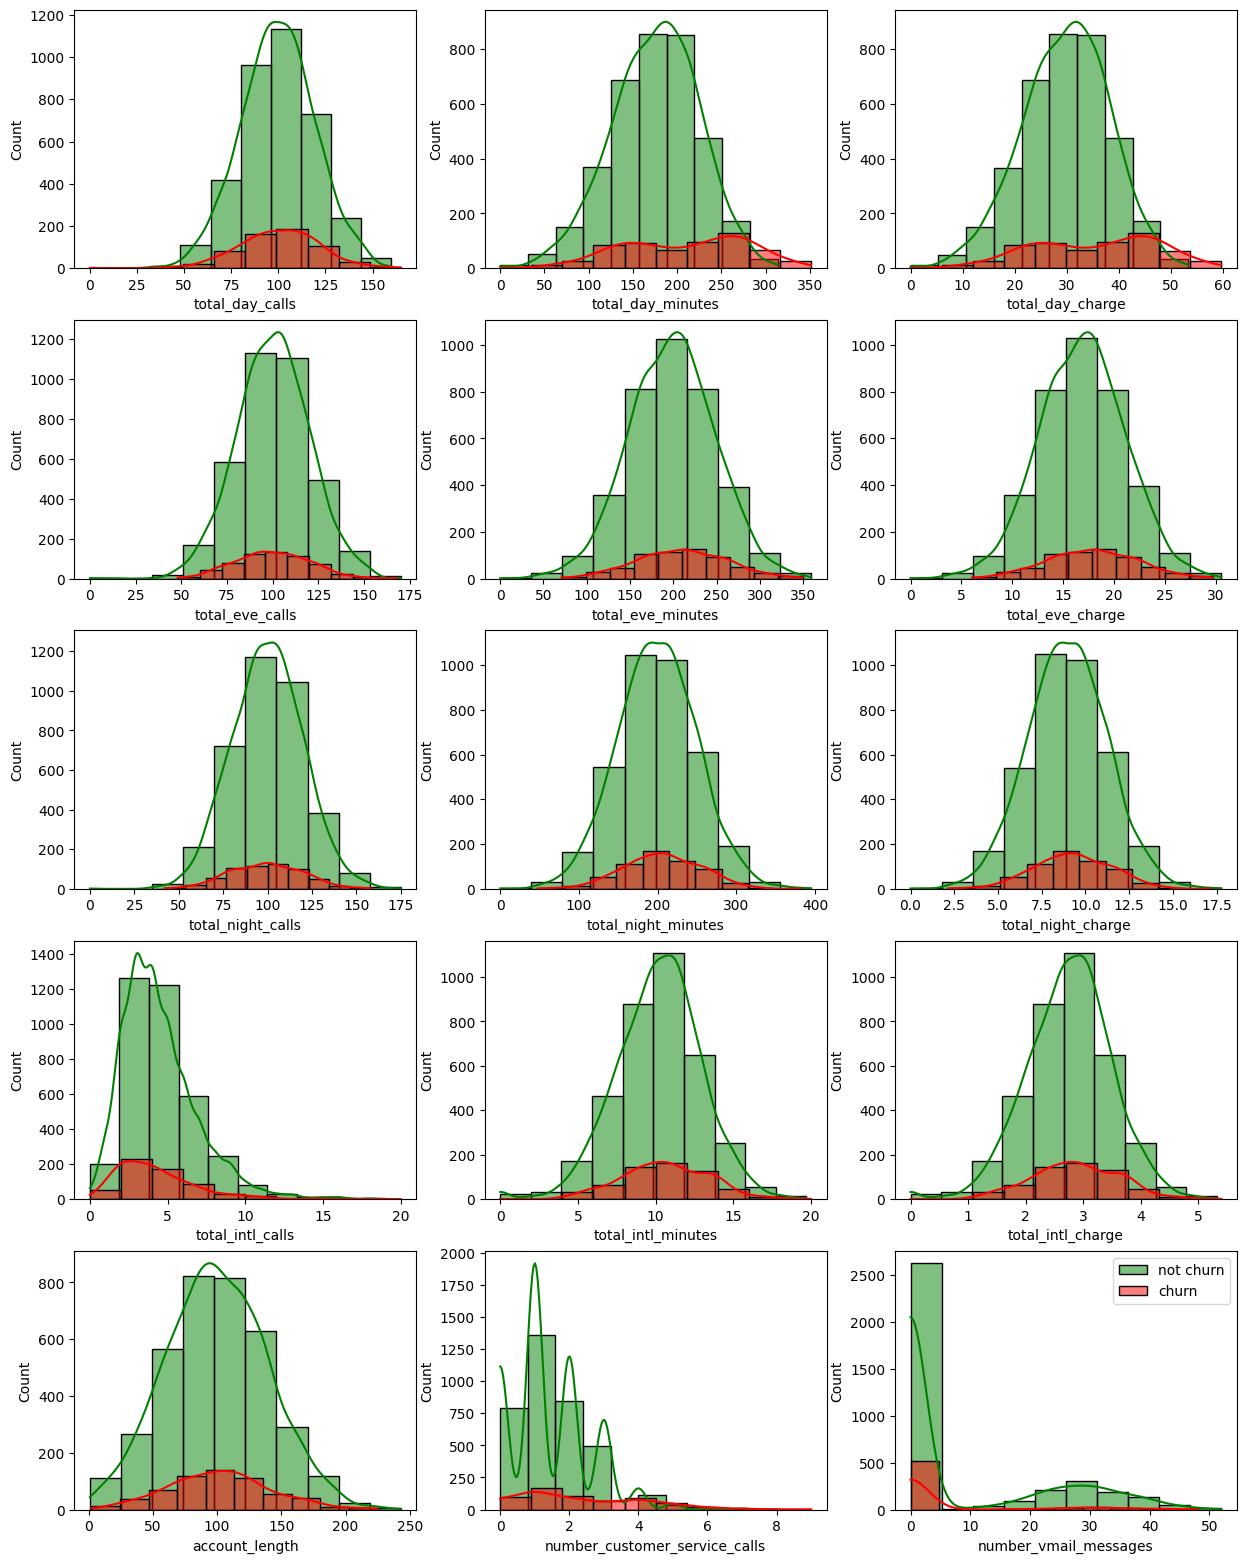

In [ ]:
fig, axes = plt.subplots(5,3, figsize=(15,5))
plt.subplots_adjust(top=8, bottom=5)

for num, ax in zip(nums, axes.flatten()):    
    sb.histplot(df_train[num][df_train['churn'] == 'no'], color='g', bins=10, label='not churn', kde=True, ax=ax)
    sb.histplot(df_train[num][df_train['churn'] == 'yes'], color='r',  bins=10, label='churn', kde=True, ax=ax)
    plt.legend()


*  Feature 'minutes'dan 'charge' untuk masing-masing kategori (day, evening, night, dan international) memiliki distribusi yang sama -> charge ditentukan lama panggilan yang dilakukan
*   Feature 'total calls' untuk tiap kategori memiliki outlier/skewed.
*   Feature 'number_customer_service_calls' dan 'number_vmail_messages' juga tidak berdistribusi normal.
*   Banyak record yang memiliki 'number_vmail_messages' di antara 0-5.


**Boxplot**




1. Mayoritas feature memiliki outlier
2. Outlier dalam data ini mungkin murni disebabkan perilaku customer (bukan kesalahan saat data entry)
3. Untuk mendapatkan model yang sesuai dengan variasi perilaku customer "di lapangan", outlier tidak dibuang

**Analisis lanjutan**



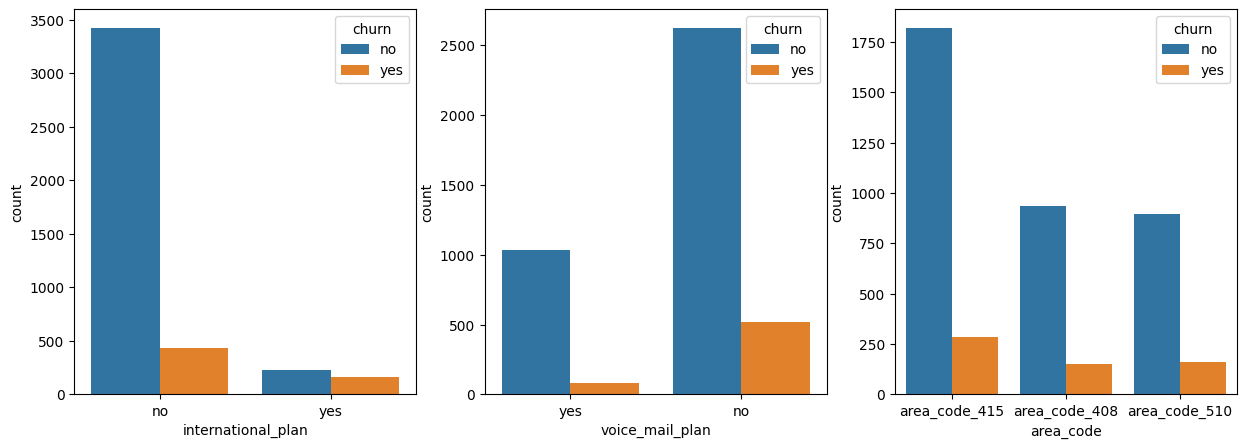

In [ ]:
cats = ['international_plan', 'voice_mail_plan', 'area_code']

fig, axes = plt.subplots(1,3, figsize=(15,5))
for cat, ax in zip(cats, axes.flatten()):
    sb.countplot(x=cat, data=df_train, hue='churn', ax=ax)

*   Lebih banyak customer yang tidak memiliki international plan dan/atau voice mail plan
*   Kebanyakan customer berada di area dengan kode 415
*   Belum dapat diambil kesimpulan mengenai kecenderungan customer untuk churn/tidak berdasarkan international plan, voice mail plan, maupun area code.


In [ ]:
min_intl_plan = df_train.query('international_plan == "yes"')['total_intl_minutes'].sum()
charge_intl_plan = df_train.query('international_plan == "yes"')['total_intl_charge'].sum()
charge_per_min_plan = charge_intl_plan / min_intl_plan

In [ ]:
min_intl_noplan = df_train.query('international_plan == "no"')['total_intl_minutes'].sum()
charge_intl_noplan = df_train.query('international_plan == "no"')['total_intl_charge'].sum()
charge_per_min_noplan = charge_intl_noplan / min_intl_noplan

In [ ]:
print(charge_per_min_noplan, charge_per_min_plan)
charge_per_min_noplan > charge_per_min_plan

0.27005072796274376 0.27004538212716644


True

Customer yang tidak memiliki international plan tetap dapat melakukan international calls, namun di-charge sedikit lebih tinggi per menitnya

**Korelasi antar feature**

<Axes: >

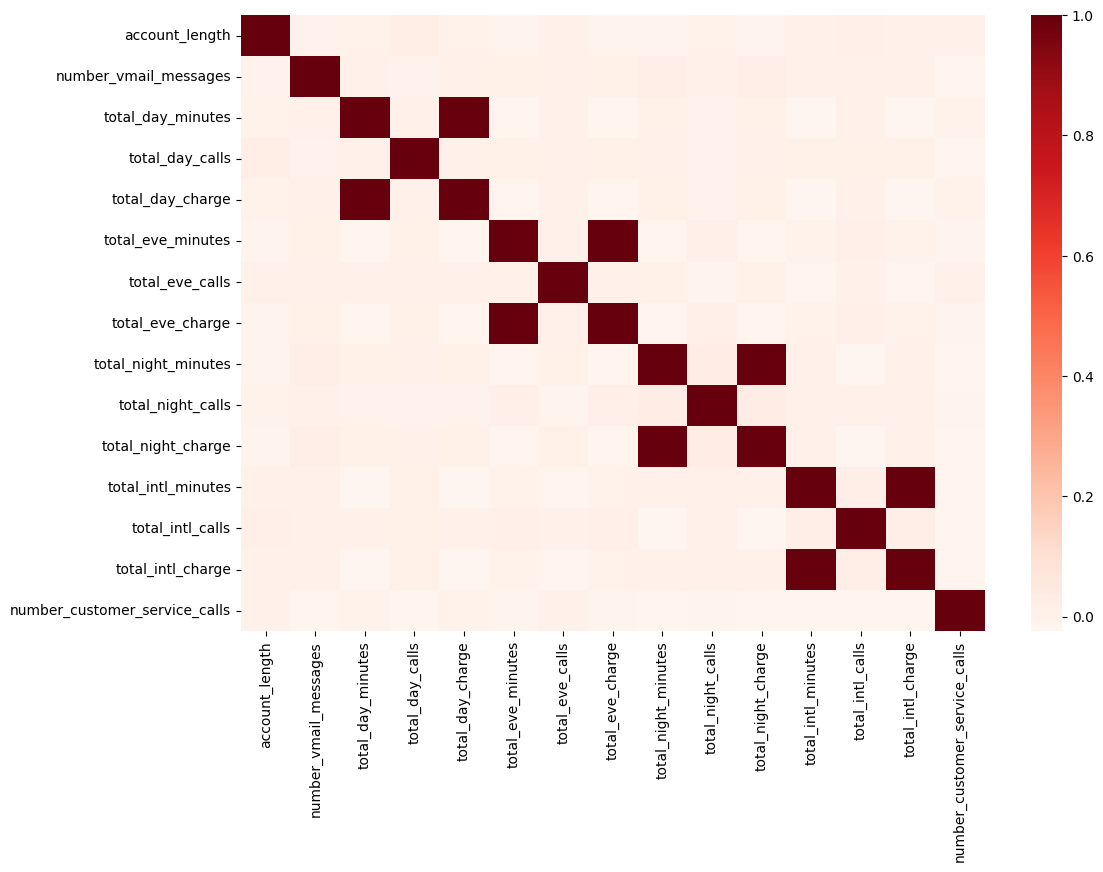

In [ ]:
plt.figure(figsize=(12,8))
sb.heatmap(df_train.corr(),cmap='Reds',annot=False)

Heatmap ini mengonfirmasi tingginya korelasi antara charge dengan lama panggilan, sehingga salah satunya dapat dihilangkan.

# **Data Preprocessing**

**Data Splitting**

In [ ]:
X = df_train.drop(columns=['churn', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])
y = df_train['churn'].replace(['yes','no'],['1','0'])

**Feature Encoding**

In [ ]:
yn_cats = ['international_plan', 'voice_mail_plan']

for cat in yn_cats:
    X[cat] = X[cat].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
from category_encoders.m_estimate import MEstimateEncoder

MEE = MEstimateEncoder()
X['state'] = MEE.fit_transform(X['state'], X['account_length'])

In [ ]:
X = pd.get_dummies(X)
X

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,99.804544,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1,0
1,101.909652,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,1,0
2,99.804544,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,1,0,0
3,101.053623,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,1,0
4,94.013736,121,0,1,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,96.225139,83,0,0,0,70,32.01,88,20.72,79,9.62,6,2.78,0,0,1,0
4246,94.715973,73,0,0,0,89,30.24,82,11.15,89,8.38,6,3.11,3,1,0,0
4247,99.916497,75,0,0,0,101,29.02,126,16.41,104,5.81,7,1.86,1,1,0,0
4248,102.759439,50,0,1,40,127,40.07,126,18.96,116,13.39,5,2.67,2,1,0,0


**Normalization**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

In [ ]:
X_train_trans = pd.DataFrame(X_train_trans,columns = X.columns)
X_test_trans = pd.DataFrame(X_test_trans,columns = X.columns)

# **Model**

Model yang akan dibandingkan:
*   KNN
*   Decision Tree
*   Random Forest

Model terbaik:

*   Tidak overfit
*   Akurasi relatif tinggi

**KNN**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_trans, y_train)

KNeighborsClassifier()

**Evaluasi KNN**

In [ ]:
knn.score(X_train_trans, y_train), knn.score(X_test_trans, y_test)

(0.9085294117647059, 0.8952941176470588)

Tidak overfit

**Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3,5,7,9,11,13],
          'weights': ['uniform', 'distance']}

grid = GridSearchCV(
             estimator=knn,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10,
             cv = 10
            )

grid.fit(X_train_trans, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
grid.score(X_train_trans, y_train), grid.score(X_test_trans, y_test)

(0.9085294117647059, 0.8952941176470588)

Hasilnya tidak lebih baik karena best parameters-nya sama dengan default parameters pada model sebelum tuning

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_trans, y_train)

DecisionTreeClassifier()

Evaluasi DTC

In [ ]:
dtc.score(X_train_trans, y_train), dtc.score(X_test_trans, y_test)

(1.0, 0.9258823529411765)

Overfit

In [ ]:
params = {'max_depth': [3,5,7,9,11,13],
          'criterion': ['gini', 'entropy']}

grid2 = GridSearchCV(
             estimator=dtc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10,
             cv = 10
            )

grid2.fit(X_train_trans, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

In [ ]:
grid2.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
grid2.score(X_train_trans, y_train), grid2.score(X_test_trans, y_test)

(0.9579411764705882, 0.9494117647058824)

Tidak overfit

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_trans, y_train)

RandomForestClassifier()

Evaluasi RF

In [ ]:
rf.score(X_train_trans, y_train), rf.score(X_test_trans, y_test)

(1.0, 0.9552941176470588)

Overfit

In [ ]:
params = {'n_estimators': [3,5,7,9,11,13],
          'criterion': ['gini','entropy']}

grid3 = GridSearchCV(
             estimator=rf,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10,
             cv = 10
            )

grid3.fit(X_train_trans, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

In [ ]:
grid3.best_params_

{'criterion': 'gini', 'n_estimators': 9}

In [ ]:
grid3.score(X_train_trans, y_train), grid2.score(X_test_trans, y_test)

(0.9955882352941177, 0.9482352941176471)

Sedikit lebih baik namun masih overfit

# **Prediction**

Berdasarkan perbandingan antar model di atas, hasil terbaik didapatkan dari klasifikasi menggunakan Decision Tree dengan criterion = entropy dan max depth = 5 (hasil hyperparameter tuning). Karena itu, model tersebut dipilih untuk digunakan dalam memprediksi data test.

In [ ]:
df_test = pd.read_csv('Data Test.csv')

# **EDA**

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

* Tidak ada data null
* Data test terdiri dari 20 kolom, 750 index
* Terdapat kolom tambahan berupa 'id'

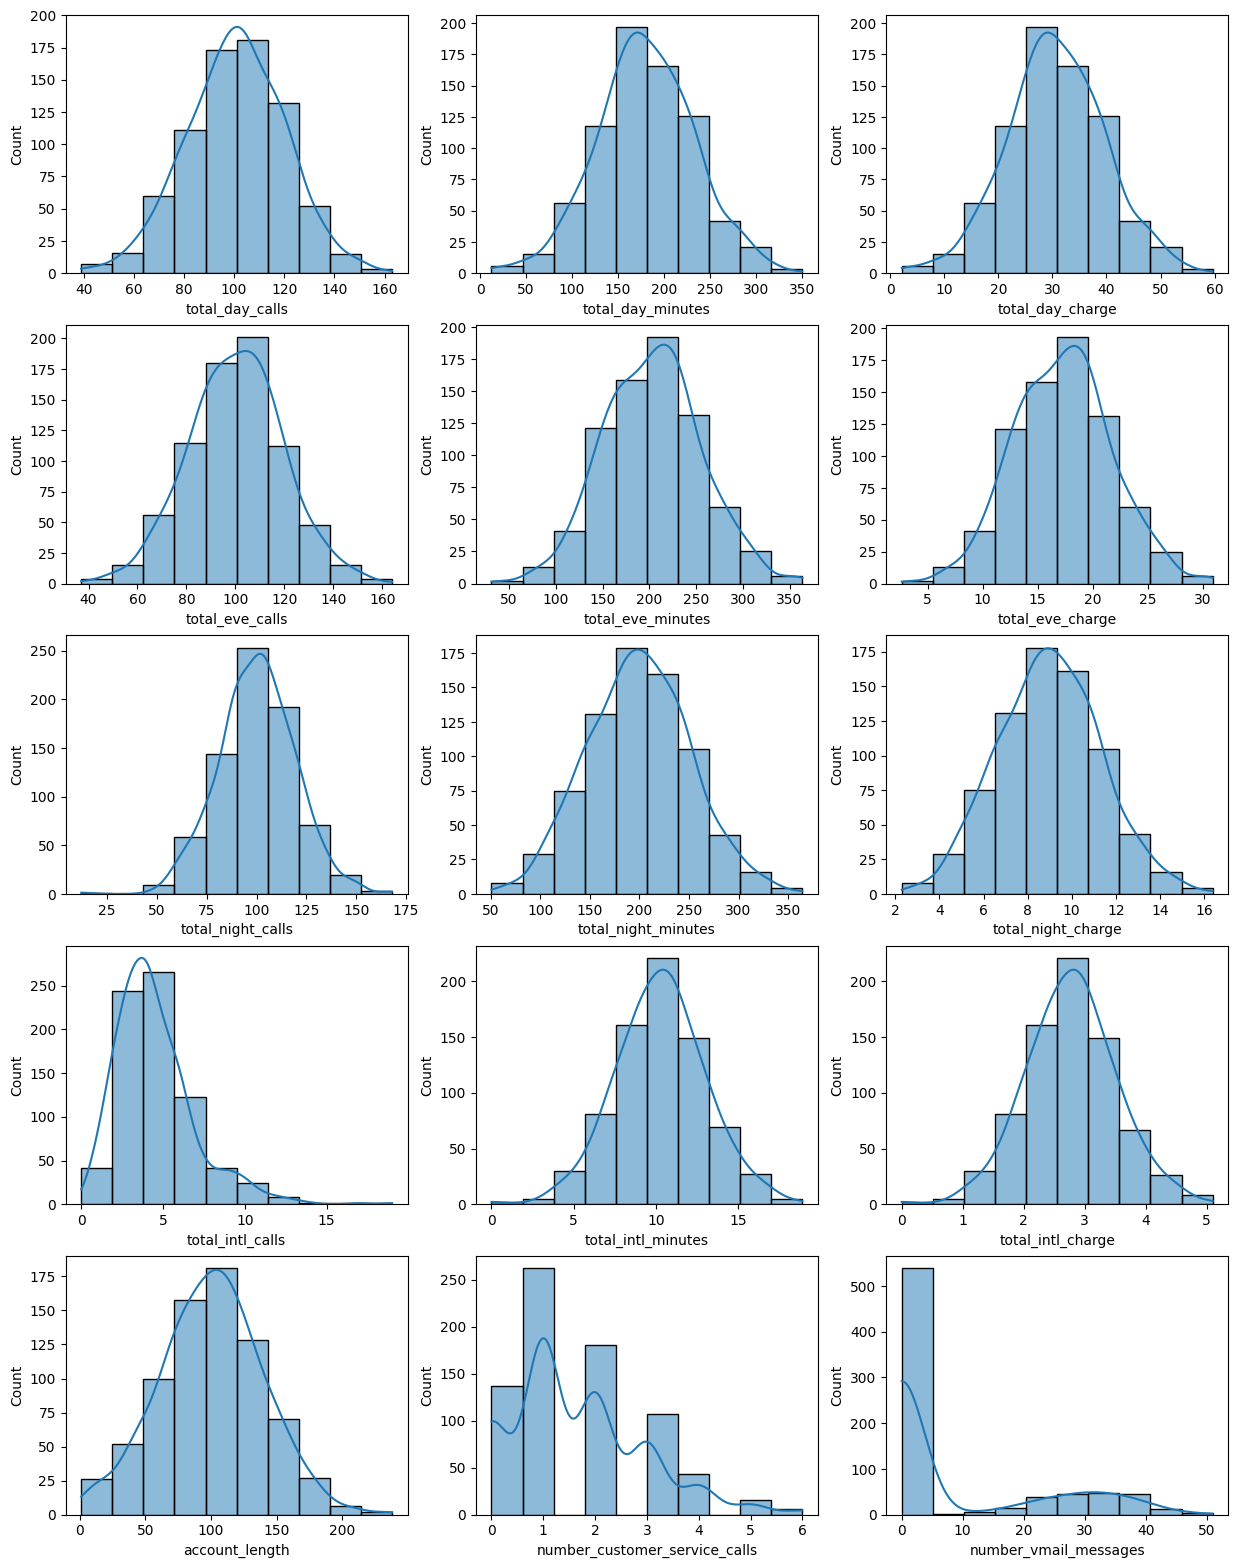

In [ ]:
fig, axes = plt.subplots(5,3, figsize=(15,5))
plt.subplots_adjust(top=8, bottom=5)

for num, ax in zip(nums, axes.flatten()):    
    sb.histplot(df_test[num], bins=10, kde=True, ax=ax)

**Kondisinya mirip dengan data train**

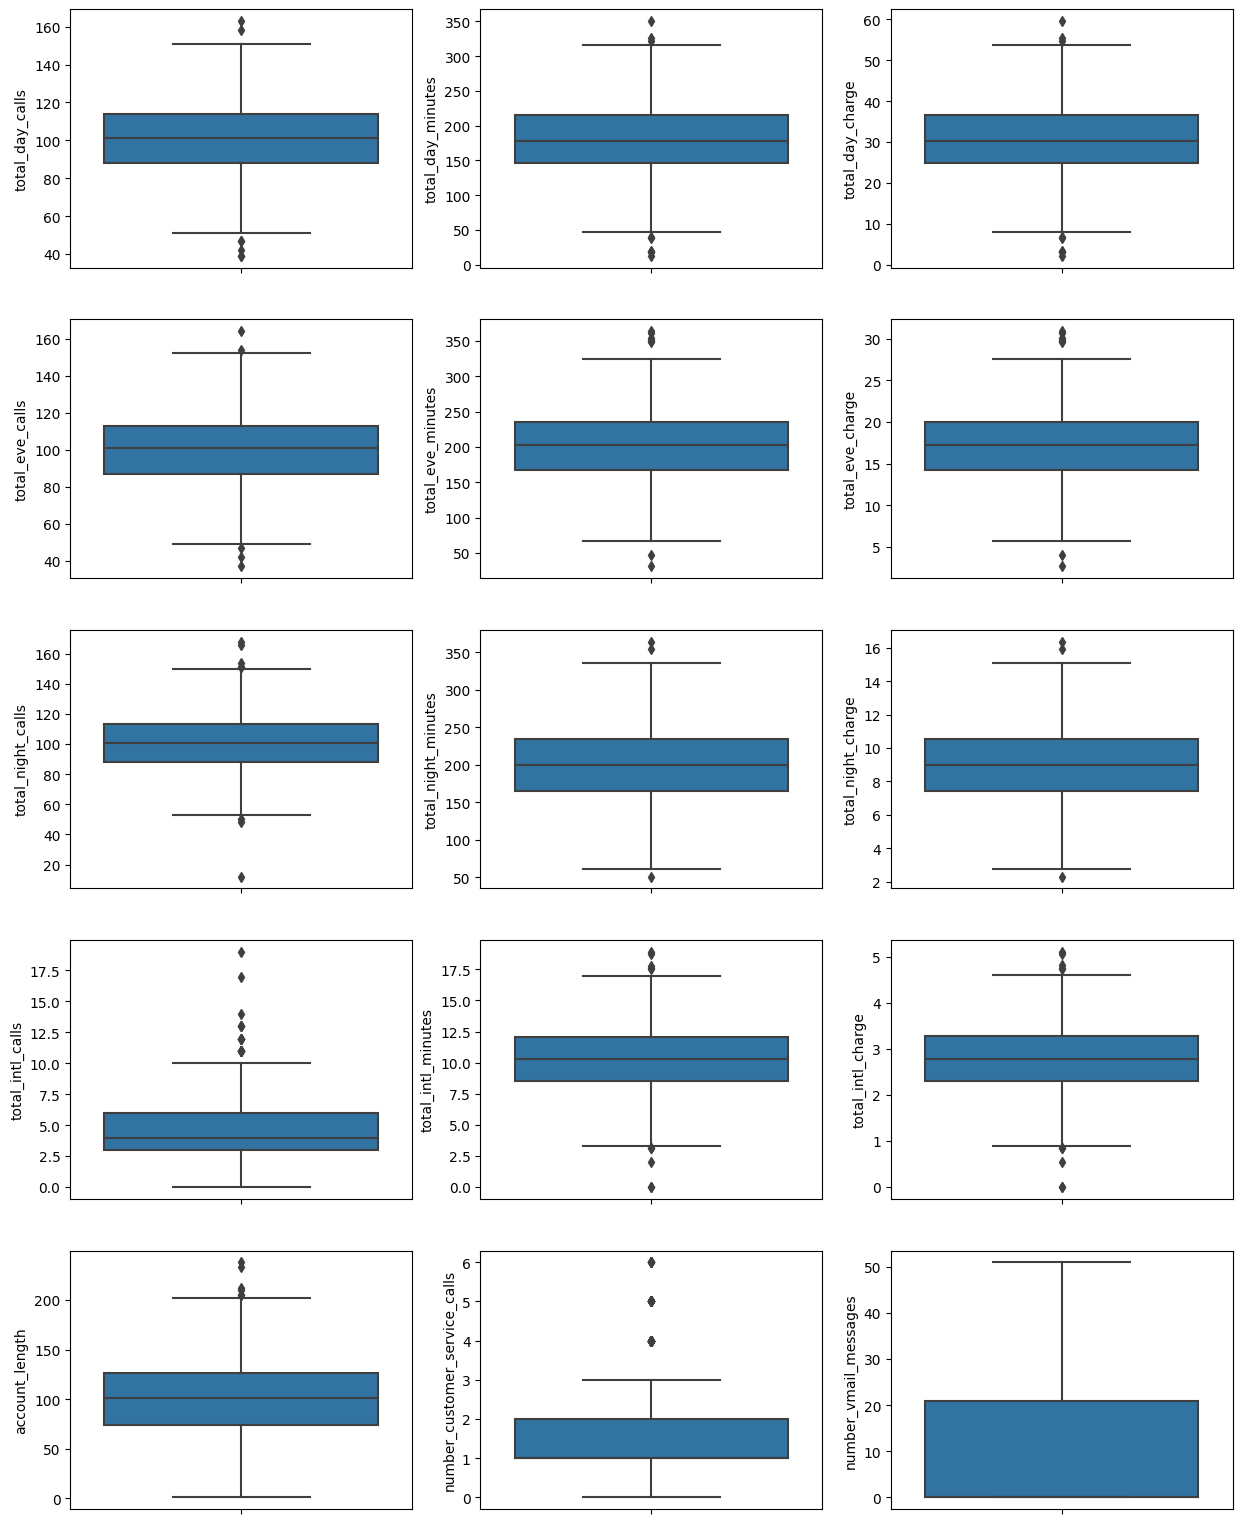

In [ ]:
fig, axes = plt.subplots(5,3, figsize=(15,5))
plt.subplots_adjust(top=8, bottom=5)

for num, ax in zip(nums, axes.flatten()):    
    sb.boxplot(data = df_test, y = num , ax=ax)

**Terdapat outlier pada mayoritas feature**

In [ ]:
# drop feature yang tidak relevan
test = df_test.drop(columns=['id', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])

# feature encoding
yn_cats = ['international_plan', 'voice_mail_plan']

for cat in yn_cats:
    test[cat] = test[cat].apply(lambda x: 1 if x == 'yes' else 0)

test['state'] = MEE.fit_transform(test['state'], test['account_length'])

test = pd.get_dummies(test)

In [ ]:
# normalization
test_trans = scaler.fit_transform(test)
test_trans = pd.DataFrame(test_trans,columns = test.columns)

In [ ]:
test_trans

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.424324,0.535865,0.0,1.0,0.490196,0.572581,0.746653,0.488189,0.500000,0.506410,0.618440,0.157895,0.529412,0.166667,0.0,1.0,0.0
1,0.518080,0.493671,1.0,0.0,0.000000,0.475806,0.623370,0.503937,0.569710,0.679487,0.488652,0.315789,0.333333,0.000000,0.0,0.0,1.0
2,0.482096,0.257384,0.0,0.0,0.000000,0.250000,0.319770,0.307087,0.830149,0.557692,0.485816,0.315789,0.694118,0.666667,0.0,1.0,0.0
3,0.386629,0.388186,0.0,0.0,0.000000,0.604839,0.526691,0.582677,0.562633,0.698718,0.251064,0.157895,0.429412,0.500000,0.0,0.0,1.0
4,0.000000,0.729958,0.0,0.0,0.000000,0.298387,0.330377,0.590551,0.739561,0.660256,0.637589,0.263158,0.821569,0.500000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.478708,0.544304,0.0,0.0,0.000000,0.483871,0.315945,0.472441,0.587049,0.634615,0.484397,0.368421,0.598039,0.000000,0.0,1.0,0.0
746,0.506828,0.303797,0.0,0.0,0.000000,0.637097,0.486698,0.370079,0.719745,0.641026,0.609220,0.105263,0.650980,0.500000,1.0,0.0,0.0
747,0.810026,0.637131,0.0,0.0,0.000000,0.411290,0.507390,0.283465,0.678698,0.647436,0.519149,0.105263,0.778431,0.500000,0.0,1.0,0.0
748,0.123638,0.253165,0.0,0.0,0.000000,0.403226,0.378543,0.716535,0.426044,0.544872,0.515603,0.210526,0.719608,0.166667,0.0,1.0,0.0


# **Predict**

In [ ]:
y_pred = grid2.predict(test_trans)

In [ ]:
df_test['churn_pred'] = y_pred
df_test.loc[:, ['id', 'churn_pred']]

,id,churn_pred
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [ ]:
print(df_test['churn_pred'].sum())

001010100111010000000100100000000000010000000000001000100010001000101000100000001000000000000000000100001110101000000011010000000000000000000101000001000000001001000000000010001000000100100100000010001001000001001100000100000001100010000000011000000000010000001000010010000101001000000000000100000001001000010000000000101101010000010100000000000000000000010100101001010010000010000000000010100000010000001000010010000100000010100000000000000000100000000110000000000000000000001000011000000100001000000110010001000000010000000010010000010000000010000000000000000000000000010011000011000000100001010100000000100001100001000000000011000111010000000101001100001100001000000000000000010000100000010100001010000101000010001001000000000000000010100000000000


In [ ]:
churn_pct = df_test['churn_pred'].astype('int').sum()/len(df_test)*100
print('Persentase customer churn berdasarkan prediksi dengan model tersebut adalah {:.2f}%'.format(churn_pct))

Persentase customer churn berdasarkan prediksi dengan model tersebut adalah 18.67%
